IMPORT ALL  

In [1]:
#   ---------  Project Forecast evaluation  ---------
#                     PROPHET MODEL 
#             
#                 ---------------------
#                   SEBASTIAN SUWADA 
#                 ---------------------
#

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


PREPARE DATA - In case of Prohpet library - there is need to change name of columns for 'ds' and 'y' 

In [2]:
def prepareData(filename):
    df = pd.read_csv(filename, sep=';')
    data_original = df[df['Category'] == 'Furniture'].copy()
    data_original = data_original[['Order Date', 'Sales']].copy()
    data_original = data_original.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
    data_original['ds'] = pd.to_datetime(data_original['ds'])
    data_original = data_original.groupby('ds').sum().reset_index()
    resampled = data_original.resample('MS', on='ds').mean()
    print(resampled.dtypes)
    return resampled


## IMPORT DATA
filename = r'/Users/sebastiansuwada/Desktop/Predictive Analytics/Project/Code/data.csv'
orginalData = prepareData(filename)

y    float64
dtype: object


SPLIT DATA INTO - Training set 75% and evaluation set 25%

In [3]:
def trainingDataPrepare(trainSize, data_temp):
    data_temp = orginalData.copy()
    trainData = pd.DataFrame()
    testData = pd.DataFrame()
    trainData['y']= data_temp[:int(trainSize*len(data_temp))]['y']
    testData['y'] = data_temp[int(trainSize*len(data_temp)):]['y']
    return trainData, testData

## SPLIT DATA INTO TRAINING AND QUALITY CHECK DATA
trainSize = 0.75
trainData, testData = trainingDataPrepare(trainSize, orginalData)

CREATE PROHPET MODEL #1 - Do not include holidays

In [5]:
def evaluateForecastPrints(initial, forecast, name_):
    initial_values = np.array(initial)
    forecast_values = np.array(forecast)
    # Mean Squared Error (MSE) and Mean Absolute Percentage Error (MAPE)
    mse = np.mean((initial_values - forecast_values)**2)
    mape = np.mean(np.abs((initial_values - forecast_values) / initial_values)) * 100
    rmse = np.sqrt(mse)
    print('MSE for '+str(name_)+' forecast '+str(mse))
    print('RMSE for '+str(name_)+' forecast '+str(rmse))
    print('MAPE for '+str(name_)+' forecast '+str(mape))

def prophetModelFirst(trainData, testData, orginalData):
    # Create a Prophet object and fit it to the data
    print(trainData.dtypes)
    
    # Reset the index and assign it back to the DataFrame
    trainData = trainData.reset_index()
    
    model = Prophet(yearly_seasonality=True)
    model.fit(trainData)
    furniture_forecast = model.make_future_dataframe(periods=12, freq='MS')
    forecast = model.predict(furniture_forecast)

    # Create dataFrame with things that interest us - predictions  
    dfForecast = pd.DataFrame()
    dfForecast['ds'] = forecast['ds']
    dfForecast['yhat'] = forecast['yhat']
    dfForecast = dfForecast.set_index('ds')
    print(dfForecast)

    evaluateForecastPrints(orginalData[36:48]['y'], dfForecast[36:48]['yhat'], 'Prophet')

    return dfForecast

## PROPHET MODELING without holidays
prohpet1 = prophetModelFirst(trainData, testData, orginalData)

16:21:20 - cmdstanpy - INFO - Chain [1] start processing


y    float64
dtype: object


16:21:21 - cmdstanpy - INFO - Chain [1] done processing


                   yhat
ds                     
2014-01-01   634.139379
2014-02-01   411.560915
2014-03-01   731.723529
2014-04-01   658.775020
2014-05-01   531.948097
2014-06-01   567.919547
2014-07-01   647.180691
2014-08-01   537.645672
2014-09-01  1150.077155
2014-10-01   640.895465
2014-11-01  1135.764754
2014-12-01  1260.527335
2015-01-01   655.246845
2015-02-01   414.914452
2015-03-01   872.162343
2015-04-01   751.928485
2015-05-01   566.822141
2015-06-01   520.765893
2015-07-01   694.301793
2015-08-01   553.810457
2015-09-01  1283.359596
2015-10-01   723.766611
2015-11-01  1189.050191
2015-12-01  1237.548814
2016-01-01   677.266651
2016-02-01   420.529229
2016-03-01   644.261823
2016-04-01   657.873741
2016-05-01   645.444783
2016-06-01   851.841733
2016-07-01   748.033260
2016-08-01   702.639163
2016-09-01  1077.508953
2016-10-01   662.146337
2016-11-01  1213.230262
2016-12-01  1494.345851
2017-01-01   804.654418
2017-02-01   601.207370
2017-03-01   782.903869
2017-04-01   754

CREATE PROPHET MODEL #2 - Include holidays

In [7]:
def prophetModelSecond(trainData, testData, orginalData, holiday):
    # Create a Prophet object and fit it to the data
    print(trainData.dtypes)
    
    # Reset the index and assign it back to the DataFrame
    trainData = trainData.reset_index()
    
    model = Prophet(yearly_seasonality = True, holidays = holiday)
    model.fit(trainData)
    furniture_forecast = model.make_future_dataframe(periods=12, freq='MS')
    forecast = model.predict(furniture_forecast)

    # Create dataFrame with things that interest us - predictions  
    dfForecast = pd.DataFrame()
    dfForecast['ds'] = forecast['ds']
    dfForecast['yhat'] = forecast['yhat']
    dfForecast = dfForecast.set_index('ds')
    print(dfForecast)

    evaluateForecastPrints(orginalData[36:48]['y'], dfForecast[36:48]['yhat'], 'Prophet')

    return dfForecast

## DEFINE HOLIDAY DAYS
holidays = pd.DataFrame({
    'holiday': 'new_year',
    'ds': pd.to_datetime(['2014-01-01', '2015-01-01', '2016-01-01'])
})

## PROPHET MODELING with holidays
prohpet2 = prophetModelSecond(trainData, testData, orginalData, holidays)

16:23:31 - cmdstanpy - INFO - Chain [1] start processing


y    float64
dtype: object


16:23:32 - cmdstanpy - INFO - Chain [1] done processing


                   yhat
ds                     
2014-01-01   634.162041
2014-02-01   411.722557
2014-03-01   731.718443
2014-04-01   658.769610
2014-05-01   531.959701
2014-06-01   567.961650
2014-07-01   647.239171
2014-08-01   537.738504
2014-09-01  1150.148268
2014-10-01   641.003482
2014-11-01  1135.841780
2014-12-01  1260.597215
2015-01-01   655.209117
2015-02-01   414.922430
2015-03-01   871.952424
2015-04-01   751.722176
2015-05-01   566.669754
2015-06-01   520.728891
2015-07-01   694.319954
2015-08-01   553.932239
2015-09-01  1283.465863
2015-10-01   723.937265
2015-11-01  1189.178083
2015-12-01  1237.612766
2016-01-01   677.245453
2016-02-01   420.354095
2016-03-01   644.423069
2016-04-01   658.043549
2016-05-01   645.571097
2016-06-01   851.833063
2016-07-01   747.963581
2016-08-01   702.461962
2016-09-01  1077.291385
2016-10-01   661.900038
2016-11-01  1212.959436
2016-12-01  1494.119702
2017-01-01   611.317055
2017-02-01   601.274951
2017-03-01   782.876441
2017-04-01   754

Plot both Prophet models

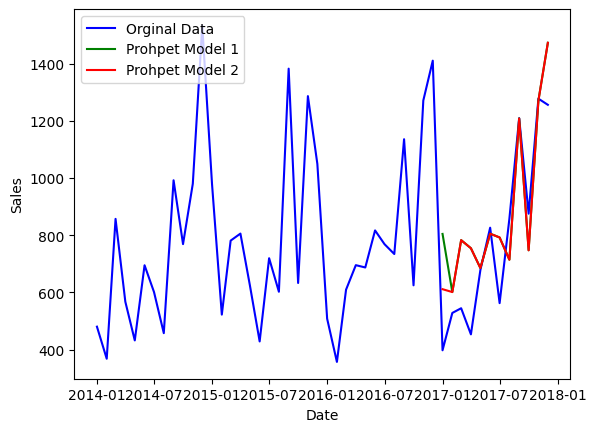

In [10]:
## PLOT FORECASTS 
plt.plot(orginalData, color = 'blue', label = 'Orginal Data')
plt.plot(prohpet1[36:48]['yhat'], color = 'green', label = 'Prohpet Model 1')
plt.plot(prohpet2[36:48]['yhat'], color = 'red', label = 'Prohpet Model 2')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

file_path = '/Users/sebastiansuwada/Desktop/Predictive Analytics/Project/Code/prophetCSV.csv'

# Save the DataFrame to a new CSV file (this will create the file if it doesn't exist)
prohpet2[36:48].to_csv(file_path, index=False)